In [1]:
import numpy as np
import pandas as pd

# Getting the Data #

In [2]:
#Load student maths course information
dfmath = pd.read_csv("student/student-mat.csv")

In [3]:
dfmath.shape

(395, 1)

In [4]:
dfmath.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [5]:
dfmath.columns

Index(['school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3'], dtype='object')

In [6]:
def create_dataframe(df):
    """Creates multicolumn dataframe from single column dataframe"""
    
    cols = pd.array(df.columns)[0].split(";")
    df2 = pd.DataFrame(columns=cols)
    num_rows = df.shape[0]
    
    #Add values to the new dataframe
    for row in range(num_rows):
        df2 = pd.concat([df2, pd.DataFrame([df.iloc[row, 0].split(";")],columns=cols)], 
                              ignore_index=True)
    return df2

In [7]:
#Create math course dataframe with proper columns
student_mathdf = create_dataframe(dfmath)
student_mathdf.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,"""F""",18,"""U""","""GT3""","""A""",4,4,"""at_home""","""teacher""",...,4,3,4,1,1,3,6,"""5""","""6""",6
1,GP,"""F""",17,"""U""","""GT3""","""T""",1,1,"""at_home""","""other""",...,5,3,3,1,1,3,4,"""5""","""5""",6
2,GP,"""F""",15,"""U""","""LE3""","""T""",1,1,"""at_home""","""other""",...,4,3,2,2,3,3,10,"""7""","""8""",10
3,GP,"""F""",15,"""U""","""GT3""","""T""",4,2,"""health""","""services""",...,3,2,2,1,1,5,2,"""15""","""14""",15
4,GP,"""F""",16,"""U""","""GT3""","""T""",3,3,"""other""","""other""",...,4,3,2,1,2,5,4,"""6""","""10""",10


In [8]:
student_mathdf.shape

(395, 33)

In [9]:
student_mathdf.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [10]:
student_mathdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    object
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    object
 7   Fedu        395 non-null    object
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    object
 13  studytime   395 non-null    object
 14  failures    395 non-null    object
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [11]:
student_mathdf.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [12]:
def strip_qoutes(df):
    """Removes qoutes from the string values"""
    
    for col in df.columns:
        if df[col].dtype == object:
            df[col] = df[col].str.replace('"', "")
    return df

In [13]:
math_df = strip_qoutes(student_mathdf.copy())

In [14]:
def str_to_numeric(df):
    """Converts columns with string data type to float"""
    
    for col in df.columns:
        try:
            df[col] = df[col].astype(np.float32)
        except:
            continue

In [15]:
str_to_numeric(math_df)
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,4.0,3.0,2.0,2.0,3.0,3.0,10.0,7.0,8.0,10.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14.0,15.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,4.0,3.0,2.0,1.0,2.0,5.0,4.0,6.0,10.0,10.0


In [16]:
math_df.dtypes

school         object
sex            object
age           float32
address        object
famsize        object
Pstatus        object
Medu          float32
Fedu          float32
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime    float32
studytime     float32
failures      float32
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float32
freetime      float32
goout         float32
Dalc          float32
Walc          float32
health        float32
absences      float32
G1            float32
G2            float32
G3            float32
dtype: object

# Data Exploration #

## Summary Statistics ##

In [17]:
#Display basic data statistic summary
math_class_stats = math_df.describe() 
math_class_stats.transpose()

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [18]:
#Number of females and males in Maths class
#F - females
#M - males
math_df["sex"].value_counts()

F    208
M    187
Name: sex, dtype: int64

In [19]:
#Amount of time each student spends studying weekly
#1 - < 2 hours, 
#2 - 2 to 5 hours, 
#3 - 5 to 10 hours, 
#or 4 - >10 hours
math_df["studytime"].value_counts()

2.0    198
1.0    105
3.0     65
4.0     27
Name: studytime, dtype: int64

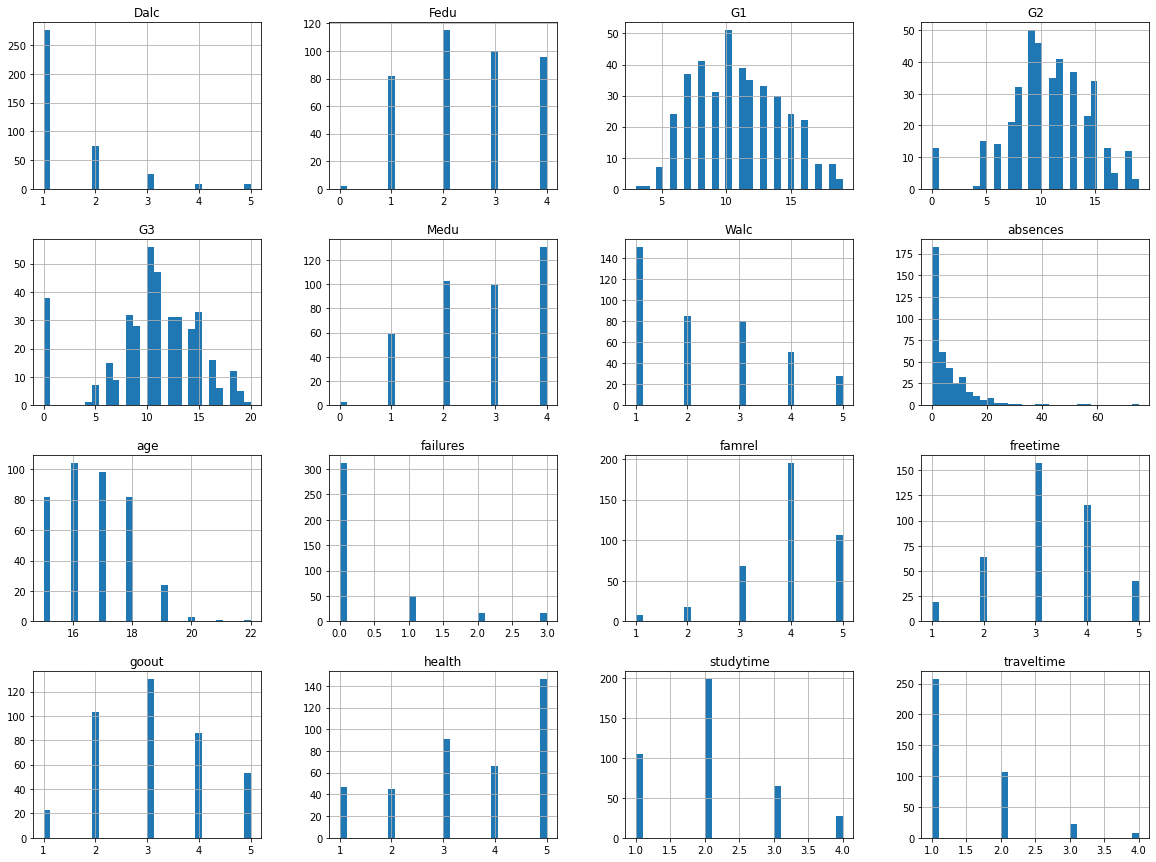

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

#Display the distributions of the numeric feautures
math_df.hist(bins=30, figsize=(20,15))
plt.show()

In [21]:
#Divide the data into representative strata
math_df["grade_cat"] = pd.cut(math_df["G3"],bins=[-0.5, 10.5, 20.5,], labels=[1, 2])

<AxesSubplot:>

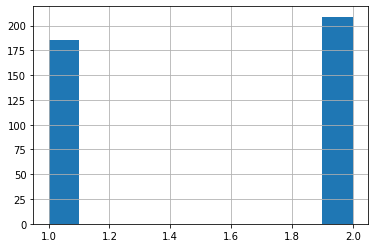

In [22]:
#Display the strata using a histogram
math_df["grade_cat"].hist()

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

#Split dataset into training and test sets using stratified sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(math_df, math_df["grade_cat"]):
    strat_train_set = math_df.loc[train_index]
    strat_test_set = math_df.loc[test_index]

In [24]:
#Stratified sampling proportions of grade category in test set
strat_test_set["grade_cat"].value_counts() / len(strat_test_set)

2    0.531646
1    0.468354
Name: grade_cat, dtype: float64

In [25]:
#Purely random sampling grade category proportions in test set
from sklearn.model_selection import train_test_split

train_set2, test_set2 = train_test_split(math_df, test_size=0.2, random_state=42)
test_set2["grade_cat"].value_counts() /len(test_set2)

2    0.518987
1    0.481013
Name: grade_cat, dtype: float64

In [26]:
#Grade category proprtions in full dataset
math_df["grade_cat"].value_counts() / len(math_df)

2    0.529114
1    0.470886
Name: grade_cat, dtype: float64

In [27]:
#Remove grade category from dataset
for set_ in (strat_train_set, strat_test_set):
    set_.drop("grade_cat", axis=1, inplace=True)

## Data Visualization ##

In [28]:
import seaborn as sns
sns.set()

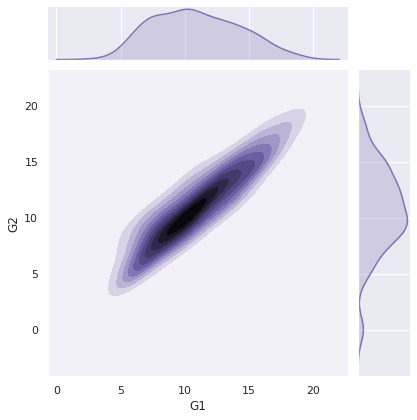

In [29]:
#Plot the joint distributions of first period grade "G1" and second period "G2"
sns.jointplot(math_df["G1"],math_df["G2"], kind="kde", color="m")

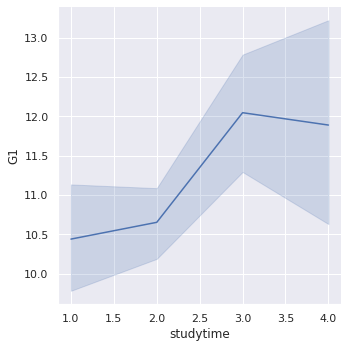

In [30]:
#Visualize relationship between studytime and first period grade "G1"
sns.relplot(x = "studytime", y = "G1", data = math_df, kind = "line")

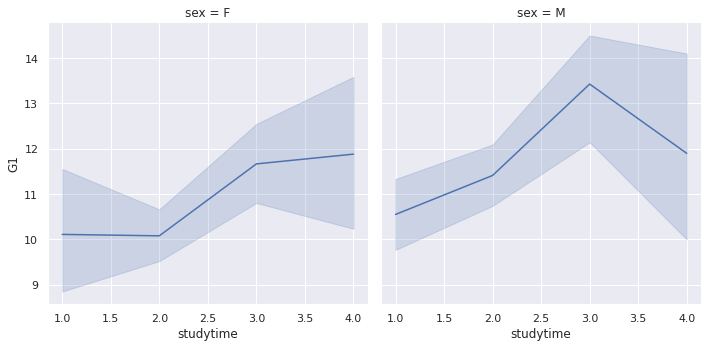

In [31]:
#Visualize relationship between studytime and first period grade "G1" based on gender
sns.relplot(x = "studytime", y = "G1",col = "sex", data = math_df, kind = "line")

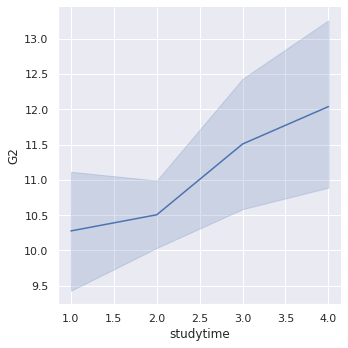

In [32]:
#Visualize relationship between studytime and second period grade "G2"
sns.relplot(x = "studytime", y = "G2", data = math_df, kind = "line")

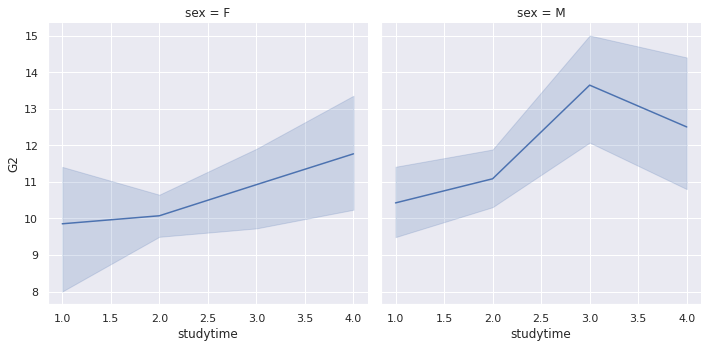

In [33]:
#Visualize relationship between studytime and second period grade "G2" based on gender
sns.relplot(x = "studytime", y = "G2",col = "sex", data = math_df, kind = "line")

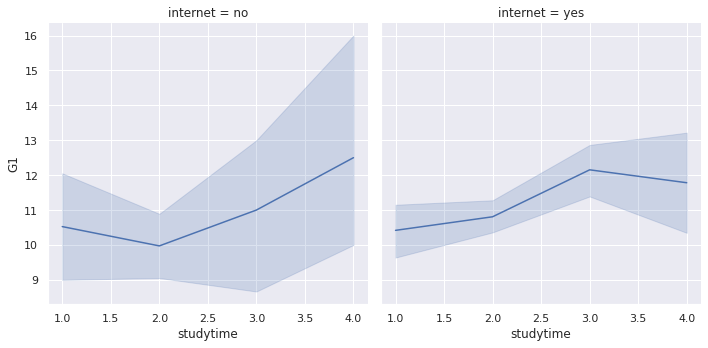

In [34]:
sns.relplot(x = "studytime", y = "G1", col = "internet", data = math_df, kind = "line")

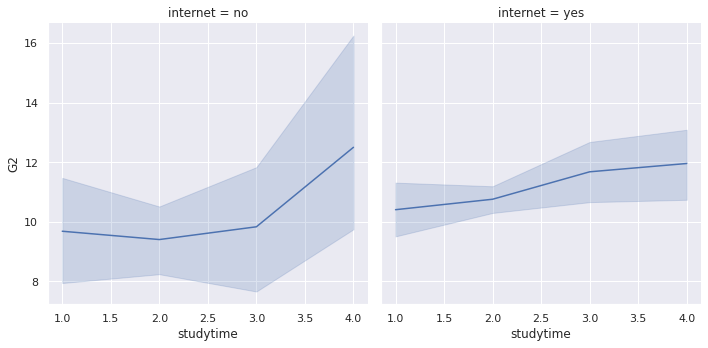

In [35]:
sns.relplot(x = "studytime", y = "G2", col = "internet", data = math_df, kind = "line")

 ## Correlations  

In [36]:
#Correlations between final grade and other features
corr_matrix = math_df.corr()
corr_matrix["G3"].sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

array([[<AxesSubplot:xlabel='G3', ylabel='G3'>,
        <AxesSubplot:xlabel='G1', ylabel='G3'>,
        <AxesSubplot:xlabel='G2', ylabel='G3'>,
        <AxesSubplot:xlabel='Medu', ylabel='G3'>,
        <AxesSubplot:xlabel='Fedu', ylabel='G3'>,
        <AxesSubplot:xlabel='failures', ylabel='G3'>],
       [<AxesSubplot:xlabel='G3', ylabel='G1'>,
        <AxesSubplot:xlabel='G1', ylabel='G1'>,
        <AxesSubplot:xlabel='G2', ylabel='G1'>,
        <AxesSubplot:xlabel='Medu', ylabel='G1'>,
        <AxesSubplot:xlabel='Fedu', ylabel='G1'>,
        <AxesSubplot:xlabel='failures', ylabel='G1'>],
       [<AxesSubplot:xlabel='G3', ylabel='G2'>,
        <AxesSubplot:xlabel='G1', ylabel='G2'>,
        <AxesSubplot:xlabel='G2', ylabel='G2'>,
        <AxesSubplot:xlabel='Medu', ylabel='G2'>,
        <AxesSubplot:xlabel='Fedu', ylabel='G2'>,
        <AxesSubplot:xlabel='failures', ylabel='G2'>],
       [<AxesSubplot:xlabel='G3', ylabel='Medu'>,
        <AxesSubplot:xlabel='G1', ylabel='Medu'>,
   

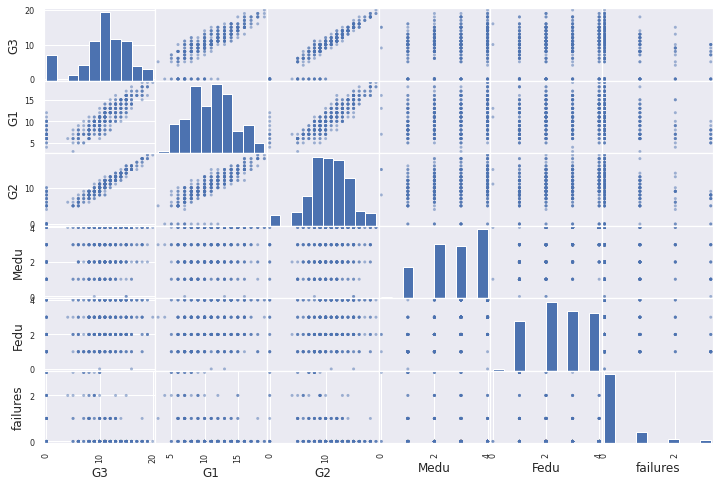

In [37]:
#Plot the correlation matrix
from pandas.plotting import scatter_matrix

attributes = ["G3", "G1", "G2","Medu", "Fedu", "failures"]
scatter_matrix(math_df[attributes], figsize=(12, 8))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='G1', ylabel='G3'>

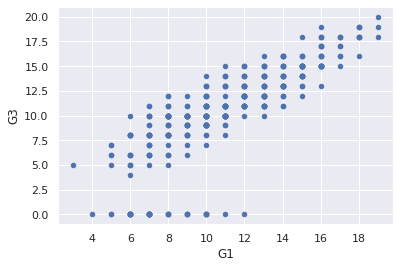

In [38]:
#Verify correlation between "G1" and "G3"
math_df.plot(kind="scatter", x="G1", y="G3")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='G2', ylabel='G3'>

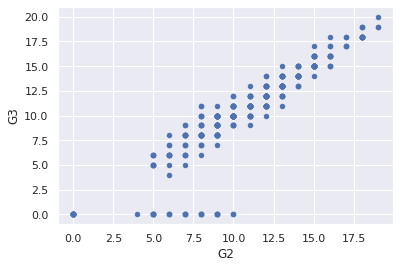

In [39]:
#Verify correlation between "G2" and "G3"
math_df.plot(kind="scatter", x="G2", y="G3")

In [41]:
math_df["mid_grade_average"] = (math_df["G1"] + math_df["G2"]) / len(math_df)
corr_matrix = math_df.corr()
corr_matrix["G3"].sort_values(ascending=False)

G3                   1.000000
G2                   0.904868
mid_grade_average    0.889792
G1                   0.801468
Medu                 0.217147
Fedu                 0.152457
studytime            0.097820
famrel               0.051363
absences             0.034247
freetime             0.011307
Walc                -0.051939
Dalc                -0.054660
health              -0.061335
traveltime          -0.117142
goout               -0.132791
age                 -0.161579
failures            -0.360415
Name: G3, dtype: float64

# Data Preparation

In [42]:
#Separate predictors and labels in test set
math_df = strat_train_set.drop("G3", axis=1)
math_df_labels = strat_train_set["G3"].copy()

In [45]:
#Categotical attributes
math_df_cat = math_df[["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian",
              "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]]
math_df_cat.head(10)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
355,MS,F,U,GT3,T,services,services,course,father,no,yes,no,no,yes,yes,no,yes
271,GP,F,U,GT3,T,other,services,reputation,father,no,yes,yes,yes,yes,yes,yes,yes
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
325,GP,M,U,GT3,T,other,other,course,mother,no,no,no,yes,yes,yes,yes,no
370,MS,F,U,LE3,T,services,services,home,other,no,no,no,yes,yes,yes,no,yes
168,GP,F,U,GT3,T,other,other,home,mother,no,yes,yes,no,no,yes,yes,no
122,GP,F,U,LE3,T,other,health,course,father,no,yes,yes,yes,yes,yes,yes,yes
148,GP,M,U,GT3,T,teacher,teacher,course,mother,no,yes,no,no,yes,no,yes,yes
176,GP,F,U,GT3,T,services,other,reputation,mother,no,no,yes,yes,no,yes,yes,no
69,GP,F,R,LE3,T,other,other,reputation,father,no,yes,no,no,no,yes,yes,no


In [46]:
#Perform one hot encoding to encode categorical attributes
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
math_df_cat_1hot = cat_encoder.fit_transform(math_df_cat)
math_df_cat_1hot

<316x43 sparse matrix of type '<class 'numpy.float64'>'
	with 5372 stored elements in Compressed Sparse Row format>

In [47]:
#List of categories
cat_encoder.categories_

[array(['GP', 'MS'], dtype=object),
 array(['F', 'M'], dtype=object),
 array(['R', 'U'], dtype=object),
 array(['GT3', 'LE3'], dtype=object),
 array(['A', 'T'], dtype=object),
 array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object),
 array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object),
 array(['course', 'home', 'other', 'reputation'], dtype=object),
 array(['father', 'mother', 'other'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object)]